<a href="https://colab.research.google.com/github/Gonzalez-Matias/Prueba/blob/main/Entrega1(_Arista_Gonz%C3%A1lez_Tello_Ortiz).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRIMERA ENTREGA PARCIAL CODERHOUSE

##### INTEGRANTES:
* Gustavo Arista
* Enzo Matias González
* Edwin Chapuel Tello
* Jose Ortiz Crisostomo

## ANÁLISIS DE LOS INDICADORES DE ENFERMEDADES DEL CORAZÓN

### Presentación del problema

Hay muchos condiciones en la salud de una persona como su estilo de vida, su edad o su historial familiar que pueden ser factores de riesgo de una enfermedad cardiaca.  
Algunos de estos factores de riesgos como los recién mencionados no pueden ser controlados , pero hay otros que son posibles controlarlos mediante un cambio en la rutina de la persona.  
En el presente proyecto buscaremos no solo identificar dichos habitos sino también buscaremos predecir que personas podrian estar afectadas por esta condición y no saberlo.

### Objetivos del proyecto

##### Objetivos generales

* Encontrar cuales son estos indicacores que hay que controloar para disminuir el riesgo de padecer una enfermedad cardíaca.
* Ver como se relacionan dichos indicadores.
* Construir un modelo de ML que sea capaz de reconocer y de advertir que una persona puede padecer enfermedades cardiacas.
* Agilizar el sistema de salud ayudando a reconocer a que areas habría que deribar a una persona que presente dichas caracteristicas.
* Generar conciencia sobre los malos habitos que pueden deribar en una enfermedad cardiaca.

##### Objetivos particulares para el modelo de ML

* Explorar la posibilidad de hacer un modelo accesible para la persona promedio por lo tanto el modelo debería ser preciso en su diagnostico y no simplemente ser un 0 o 1.  
Debería ser capaz de dar un porcentaje de posibilidad de que la persona padezca una enfermedad cardiaca y además señalar cuales son los valores promedio para una persona de la edad del paciente así este puede tomar la decisión de ir al medico de forma activa basado en la información proporcionada.
* Explorar la posibilidad de hacer un modelo que asista en los hospitales en la agilización del detectado de personas con riesgo de padecer una enfermedad cardiaca.

### Origen de los datos

Estos datos provienen del CDC (Centros para el Control y la Prevención de Enfermedades) y es una parte importante del Sistema de Vigilancia de Factores de Riesgo del Comportamiento (BRFSS), que realiza encuestas telefónicas anuales para recopilar datos sobre el estado de salud de los residentes de EE. UU. El conjunto de datos más reciente (al 15 de febrero de 2022) incluye datos de 2020. Consta de 320 000 filas y 279 columnas. La gran mayoría de las columnas son preguntas que se hacen a los encuestados sobre su estado de salud, como "¿Tiene serias dificultades para caminar o subir escaleras?" o "¿Has fumado al menos 100 cigarrillos en toda tu vida?.En este dataset se redujo la cantidad de columna en tan solo 18 que fueron las mas relevantes para que sea mas manejables para modelos de ML ya que varias preguntas hacian referencia a un mismo insight

### Descripcion de las features

1. *HeartDisease(TARGET)*: Encuestados que alguna vez informaron tener enfermedad coronaria (CHD) o infarto de miocardio (MI)
2. *BMI*: Índice de masa corporal (IMC)
3. *Smoking*: ¿Ha fumado al menos 100 cigarrillos en toda su vida? [Nota: 5 paquetes = 100 cigarrillos]
4. *AlcoholDrinking*: Bebedores empedernidos (hombres adultos que beben más de 14 tragos por semana y mujeres adultas que beben más de 7 tragos por semana)
5. *Stroke*: ¿Alguna vez le dijeron/tuvo un derrame cerebral?
6. *PhysicalHealth*: Salud física, que incluye enfermedades y lesiones físicas, ¿durante cuántos días durante los últimos 30 días su salud física no fué buena? (0-30 días)
7. *MentalHealth*: Salud mental, ¿durante cuántos días durante los últimos 30 días su salud mental no fue buena? (0-30 días)
8. *DiffWalking*: ¿Tiene serias dificultades para caminar o subir escaleras?
9. *Sex*: ¿Es usted hombre o mujer?
10. *AgeCategory*: Categoría de edad de catorce niveles
11. *Race*: Raza/origen étnico imputado
12. *Diabetic*: ¿Alguna vez le dijeron que usted tiene/tenía diabetes?
13. *PhysicalActivity*: Adultos que informaron haber realizado actividad física o ejercicio durante los últimos 30 días además de su trabajo habitual
14. *GenHealth*: Diría usted que en general su salud es...(Muy mala, mala, buena...)
15. *SleepTime*: En promedio, ¿cuántas horas duerme en un período de 24 horas?
16. *Asthma*: ¿Alguna vez le dijeron que usted tiene/tenía asma?
17. *KidneyDisease*: Sin incluir cálculos renales, infección de la vejiga o incontinencia, ¿Alguna vez le dijeron que tenía una enfermedad renal?
18. *SkinCancer*: ¿Alguna vez le dijeron que tiene/tenía cáncer de piel?

## PRIMERA EXPLORACION DE DATOS

In [ ]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , RobustScaler, StandardScaler, QuantileTransformer, OneHotEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import train_test_split

In [ ]:
! pip install -q kaggle
k = {"username":"matiasenzo",
     "key":"31c73558e4452067f40835fa10be59e8"}
with open('kaggle.json', 'w') as fp:
    json.dump(k, fp)
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kamilpytlak/personal-key-indicators-of-heart-disease
!mkdir heart-disease
!unzip personal-key-indicators-of-heart-disease.zip -d heart-disease

  0% 0.00/3.13M [00:00<?, ?B/s]
100% 3.13M/3.13M [00:00<00:00, 91.1MB/s]
Archive:  personal-key-indicators-of-heart-disease.zip
  inflating: heart-disease/heart_2020_cleaned.csv  


In [ ]:
heart_data = pd.read_csv("heart-disease/heart_2020_cleaned.csv")

In [ ]:
heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
heart_data.shape

(319795, 18)

Hay 18 features en nuestro dataset y 319795 filas

In [ ]:
heart_data.duplicated().value_counts()

False    301717
True      18078
dtype: int64

Eliminamos las 18078 filas duplicadas

In [ ]:
heart_data = heart_data[heart_data.duplicated()==False]

In [ ]:
heart_data.duplicated().value_counts()

False    301717
dtype: int64

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [ ]:
pd.DataFrame(heart_data.isnull().sum()/len(heart_data), columns=["Porcentaje de nulos"])

,Porcentaje de nulos
HeartDisease,0.0
BMI,0.0
Smoking,0.0
AlcoholDrinking,0.0
Stroke,0.0
PhysicalHealth,0.0
MentalHealth,0.0
DiffWalking,0.0
Sex,0.0
AgeCategory,0.0


* Poseemos 301717 datos en nuestro dataset
* Hay 18 features
* No hay datos nulos en nuestro dataset
* Hay cuatro columnas numericas, cada una de ellas de tipo ordinal
* Hay 13 columnas categoricas
* El target (HeartDisease) es categorico binario (Si/No) que indica la presencia de la enfermedad

### Mas info de nuestras features de tipo object

In [ ]:
tipos = pd.DataFrame(heart_data.dtypes, index=heart_data.columns)
tipos.columns = ["Tipo"]
tipos["N_categorias"] = "~"
tipos["Categorias"] = "~"
for col in heart_data.columns:
  if  tipos["Tipo"][col] == "object":
    tipos["N_categorias"][col] = heart_data[col].nunique()
    tipos["Categorias"][col] = str(sorted(list(heart_data[col].unique())))[1:-1]
tipos

,Tipo,N_categorias,Categorias
HeartDisease,object,2,"'No', 'Yes'"
BMI,float64,~,~
Smoking,object,2,"'No', 'Yes'"
AlcoholDrinking,object,2,"'No', 'Yes'"
Stroke,object,2,"'No', 'Yes'"
PhysicalHealth,float64,~,~
MentalHealth,float64,~,~
DiffWalking,object,2,"'No', 'Yes'"
Sex,object,2,"'Female', 'Male'"
AgeCategory,object,13,"'18-24', '25-29', '30-34', '35-39', '40-44', '..."


* Podemos observar cantidad y nombres de las categorias en nuestras features de tipo object
* De nuestras feautures categoricas 10 son de tipo binario

### Estadisticas de nuestras features de tipo float64

In [ ]:
desc_info = round(heart_data.describe(),3).T
desc_info

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325,6.356,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.372,7.951,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898,7.955,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097,1.436,1.00,6.00,7.00,8.00,24.00


##### Concluciones


* Tanto en la feature PhysicalHealth como en MentalHealth tenemos mas del 50% de datos con valor de 0, algo que tendremos investigar mas a fondo mas adelante

## ANALISIS UNIVARIADO

#### *HeartDisease(Target)*

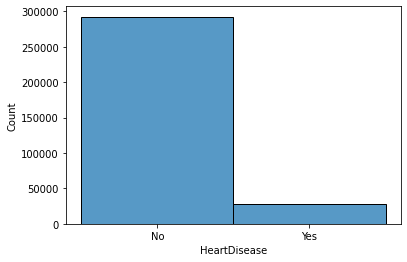

,cantidad_de_personas,porcentaje
No,292422,91.44
Yes,27373,8.56


In [ ]:
sns.histplot(data=heart_data, x="HeartDisease")
plt.show()
dist_target = pd.DataFrame(heart_data.HeartDisease.value_counts())
dist_target["porcentaje"] = round(dist_target.HeartDisease/len(heart_data)*100,2)
dist_target.rename({"HeartDisease":"cantidad_de_personas"}, inplace=True, axis=1)
dist_target

* La columna de HeartDisease(Target) está muy desbalanceada ----> No(91.44%), Si(8.56%)

#### *Smoking*

In [ ]:
dist_smo = pd.DataFrame(heart_data.Smoking.value_counts())
dist_smo["porcentaje"] = round(dist_smo.Smoking/len(heart_data)*100,2)
dist_smo.rename({"Smoking":"dist_fumadores"}, inplace=True, axis=1)
dist_smo

,dist_fumadores,porcentaje
No,187887,58.75
Yes,131908,41.25


* La feature Smoking no tiene un gran desbalanceo

#### *AlcoholDrinking*

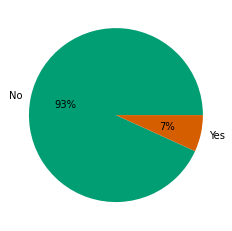

In [ ]:
colors = sns.color_palette('colorblind')[2:7]
plt.pie(x=heart_data.AlcoholDrinking.value_counts(), labels=heart_data.AlcoholDrinking.unique(), colors=colors, autopct='%.0f%%')
plt.show()

* La columna AlcoholDrinking está muy desbalanceada

#### *DiffWalking*

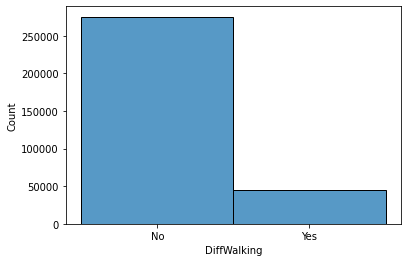

In [ ]:
sns.histplot(data=heart_data, x="DiffWalking")
plt.show()

* La columna DiffWalking está muy desbalanceada

#### *BMI*

Grafico de caja para visualizar la presencia de outliers

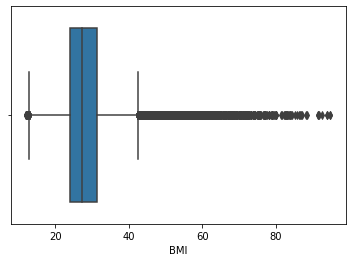

In [ ]:
sns.boxplot(data=heart_data,x="BMI")
plt.show()

In [ ]:
bmi_desc = heart_data.describe()[1:].T[:1]
bmi_desc["coef_var"] = bmi_desc["std"]/bmi_desc["mean"]*100
bmi_desc

,mean,std,min,25%,50%,75%,max,coef_var
BMI,28.325399,6.3561,12.02,24.03,27.34,31.42,94.85,22.439579


In [ ]:
q1, q3 = np.percentile(heart_data.BMI, [25, 75])
iqr = q3 - q1
lim_inf = q1 - (1.5 * iqr)
lim_sup = q3 + (1.5 * iqr)
print((len(heart_data.loc[heart_data.BMI<lim_inf]),len(heart_data.loc[heart_data.BMI>lim_sup])))

(45, 10351)


 * El bmi promedio es de 28.3 con una desviacion estandar de 6.4
* El rango de datos de bmi va desde 12.02 a 94.85
* El coeficiente de variacion es de 22.4% por lo que la dispercion es muy baja
* El 25% de las personas posee un BMI de 24.03 o menos
* El 50% de las personas posee un BMI de 27.34 o menos
* El 75% de las personas posee un BMI de 31.42 o menos
* Hay 45 posibles outliers inferiores y 10351 superiores

#### *PhysicalHealth*

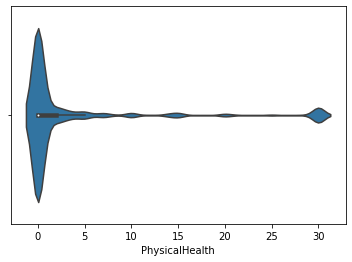

In [ ]:
sns.violinplot(data=heart_data,
               x="PhysicalHealth"
               )
plt.show()

In [ ]:
phh_desc = heart_data.describe()[1:].T[1:2]
phh_desc["coef_var"] = phh_desc["std"]/phh_desc["mean"]*100
phh_desc

,mean,std,min,25%,50%,75%,max,coef_var
PhysicalHealth,3.37171,7.95085,0.0,0.0,0.0,2.0,30.0,235.810618


In [ ]:
q1, q3 = np.percentile(heart_data.PhysicalHealth, [25, 75])
iqr = q3 - q1
lim_inf = q1 - (1.5 * iqr)
lim_sup = q3 + (1.5 * iqr)
print((len(heart_data.loc[heart_data.PhysicalHealth<lim_inf]),len(heart_data.loc[heart_data.PhysicalHealth>lim_sup])))

(0, 47146)


* La PhysicalHealth promedio es de 3.4 con una desviacion estandar de 7.95
* El rango de datos de PhysicalHealth va desde 0 a 30
* El coeficiente de variacion es de 235.8% por lo que la dispercion es alta
* El 50% de las personas posee un PhysicalHealth de 0
* El 75% de las personas posee un PhysicalHealth de 2 o menos
* Hay 0 posibles outliers inferiores y 47146 superiores

## ANALISIS BIVARIADO

#### Analisis de correlación entre features

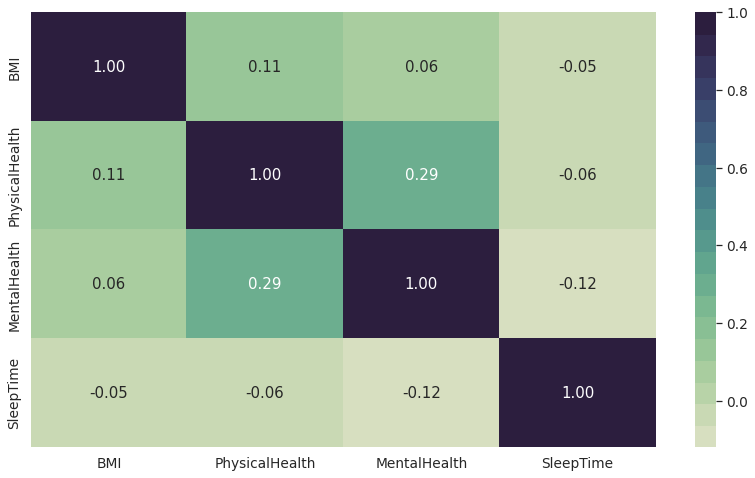

In [ ]:
plt.figure(figsize = (14,8))
sns.set(font_scale = 1.25)
sns.heatmap(heart_data[heart_data.columns].corr(),annot = True, fmt = ".2f", 
           cmap = (sns.cubehelix_palette(20, start = 0.5, rot = -0.75)))
plt.show()

##### Concluciones

* Como se puede observar arriba no hay grandes correlaciones entre nuestras variables numéricas

#### *HeartDisease(Target) vs BMI*

##### Onjetivo
* ¿El BMI promedio cambia entre las personas que tienen problemas del corazon y las que no?
* Al aumentar el BMI ¿Aumentan los casos de enfermedades cardiacas?

In [ ]:
data_tg_bmi_m = heart_data.groupby(["HeartDisease"])["BMI"].mean()
data_tg_bmi_c = heart_data.groupby(["HeartDisease"])["BMI"].count()
data_tg_bmi_std = heart_data.groupby(["HeartDisease"])["BMI"].std()
data_tg_bmi = pd.DataFrame(data_tg_bmi_m)
data_tg_bmi.columns = ["bmi_prom"]
data_tg_bmi["count"] = data_tg_bmi_c
data_tg_bmi["std"] = data_tg_bmi_std
data_tg_bmi["coef_var"] = round(data_tg_bmi["std"]/data_tg_bmi["bmi_prom"]*100,2)
data_tg_bmi

,bmi_prom,count,std,coef_var
HeartDisease,,,,
No,28.345630,274456,6.448337,22.75
Yes,29.411893,27261,6.586240,22.39


In [ ]:
heart_data["quintil_grosor"] = 1
heart_data["quintil_grosor"] = heart_data.BMI.apply(lambda x: 1 if x<=23.29 else (2 if (x>23.29) & (x<=25.83) else (3 if (x>25.83) & (x<=28.69) else (4 if (x>28.69) & (x<=32.55) else 5))))

In [ ]:
df_quintil_grosor = heart_data.groupby(["quintil_grosor"], dropna=False)["BMI"].min().to_frame(name='min').join(heart_data.groupby(["quintil_grosor"], dropna=False)["BMI"].max().to_frame(name='max')).join(heart_data.groupby(["quintil_grosor"], dropna=False)["BMI"].count().to_frame(name='nro_casos'))
df_quintil_grosor

,min,max,nro_casos
quintil_grosor,,,
1,12.02,23.29,63881
2,23.30,25.83,63410
3,25.84,28.69,63092
4,28.70,32.55,64334
5,32.56,94.85,65078


In [ ]:
ct = pd.crosstab(heart_data.HeartDisease,heart_data.quintil_grosor, margins=True).T*100
ct["No"] = ct["No"]/ct["All"]*100
ct["Yes"] = ct["Yes"]/ct["All"]*100
ct["All"] = ct["All"]/ct["All"]*100
ct.drop("All", inplace = True)
ct

HeartDisease,No,Yes,All
quintil_grosor,,,
1,93.797843,6.202157,100.0
2,92.578458,7.421542,100.0
3,91.285741,8.714259,100.0
4,90.271085,9.728915,100.0
5,89.323581,10.676419,100.0


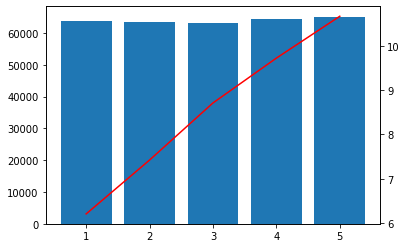

In [ ]:
fig, ax1 = plt.subplots()  
ax1.bar(x= df_quintil_grosor.index , height=df_quintil_grosor['nro_casos'])
ax2 = ax1.twinx()
ax2.plot(ct.index, ct['Yes'], color="red")
plt.show()

* El bmi promedio no tiene grandes cambios entre personas con y sin la enfermedad --->(si-29.4/no-28.2)
* Sin embargo el % de personas con problemas cardiacos aumenta respecto a bmi----->   
bajo_bmi/6.2% - alto_bmi/10.7%

#### *HeartDisease(Target) vs Stroke, Smoking, DiffWalking, KidneyDisease, SkinCancer*

In [ ]:
data_stk_x_hd = pd.crosstab(heart_data.HeartDisease, heart_data.Stroke, margins=True).drop("All")
data_stk_x_hd["No"] = data_stk_x_hd["No"]/data_stk_x_hd["All"]*100
data_stk_x_hd["Yes"] = data_stk_x_hd["Yes"]/data_stk_x_hd["All"]*100
data_stk_x_hd["All"] = data_stk_x_hd["All"]/data_stk_x_hd["All"]*100

In [ ]:
data_smk_x_hd = pd.crosstab(heart_data.HeartDisease, heart_data.Smoking, margins=True).drop("All")
data_smk_x_hd["No"] = data_smk_x_hd["No"]/data_smk_x_hd["All"]*100
data_smk_x_hd["Yes"] = data_smk_x_hd["Yes"]/data_smk_x_hd["All"]*100
data_smk_x_hd["All"] = data_smk_x_hd["All"]/data_smk_x_hd["All"]*100

In [ ]:
data_walk_x_hd = pd.crosstab(heart_data.HeartDisease, heart_data.DiffWalking, margins=True).drop("All")
data_walk_x_hd["No"] = data_walk_x_hd["No"]/data_walk_x_hd["All"]*100
data_walk_x_hd["Yes"] = data_walk_x_hd["Yes"]/data_walk_x_hd["All"]*100
data_walk_x_hd["All"] = data_walk_x_hd["All"]/data_walk_x_hd["All"]*100

In [ ]:
data_kca_x_hd = pd.crosstab(heart_data.HeartDisease, heart_data.KidneyDisease, margins=True).drop("All")
data_kca_x_hd["No"] = data_kca_x_hd["No"]/data_kca_x_hd["All"]*100
data_kca_x_hd["Yes"] = data_kca_x_hd["Yes"]/data_kca_x_hd["All"]*100
data_kca_x_hd["All"] = data_kca_x_hd["All"]/data_kca_x_hd["All"]*100

In [ ]:
data_skca_x_hd = pd.crosstab(heart_data.HeartDisease, heart_data.SkinCancer, margins=True).drop("All")
data_skca_x_hd["No"] = data_skca_x_hd["No"]/data_skca_x_hd["All"]*100
data_skca_x_hd["Yes"] = data_skca_x_hd["Yes"]/data_skca_x_hd["All"]*100
data_skca_x_hd["All"] = data_skca_x_hd["All"]/data_skca_x_hd["All"]*100

In [ ]:
data_smk_x_hd["Stroke_Yes"] = data_stk_x_hd["Yes"]
data_smk_x_hd["Dif_walk_Yes"] = data_walk_x_hd["Yes"]
data_smk_x_hd["Skin_cancer_Yes"] = data_skca_x_hd["Yes"]
data_smk_x_hd["Kidn_desc_Yes"] = data_kca_x_hd["Yes"]

In [ ]:
comp = data_smk_x_hd[["Yes","Stroke_Yes","Dif_walk_Yes","Skin_cancer_Yes","Kidn_desc_Yes"]]
comp.columns = ["Fuma","Derrame cerebral","Dif. para caminar","Cancer de piel","Enf. de riñones"]
comp.index = ["No","Si"]
comp.index.name = "Enfermedad cardiaca"
comp.columns.name = "Condición que presenta"

In [ ]:
comp

Condición que presenta,Fuma,Derrame cerebral,Dif. para caminar,Cancer de piel,Enf. de riñones
Enfermedad cardiaca,,,,,
No,39.624584,2.626341,11.757665,8.494231,2.846571
Si,58.586929,16.034048,36.634640,18.193110,12.621927


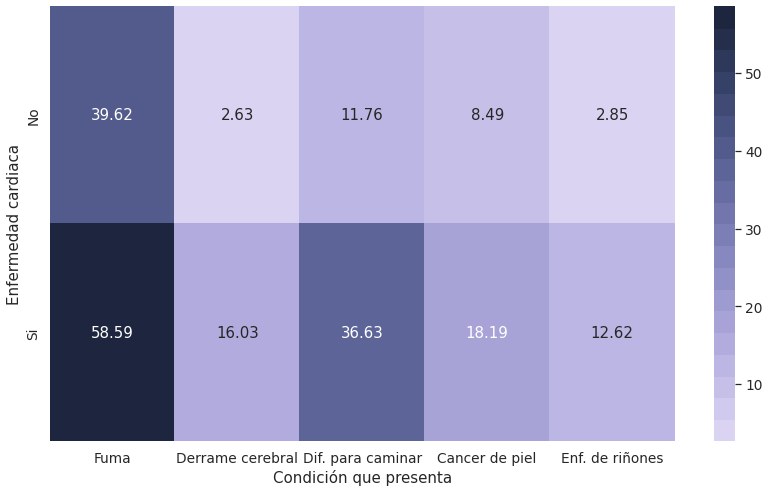

In [ ]:
plt.figure(figsize = (14,8))
sns.set(font_scale = 1.25)
sns.heatmap(comp, annot = True, fmt = ".2f", 
           cmap = (sns.cubehelix_palette(20, start = 2.8, rot = 0.1)))
plt.show()

* El porcentaje de personas que han fumado o fuman es bastante mayor entre las personas que poseen problemas  
cardiacos --->  No-39.6% // Si-58.6%
* El porcentaje de personas que sufrieron derrames cerebrales en el pasado es mucho mayor entre las personas que poseen problemas cardiacos ---> No-2.6% // Si-16%
* El porcentaje de personas que tienen dificultad para caminar o subir escaleras es mucho mayor entre las personas que poseen problemas cardiacos ---> No-11.8% // Si-36.6%
* El porcentaje de personas que sufren o sufrieron enfermedades de los riñones es mayor entre las personas que poseen problemas cardiacos --->  No-2.8% // Si-12.6%
* El porcentaje de personas que sufren o sufrieron cancer de piel es mucho mayor entre las personas que poseen problemas  
cardiacos --->  No-8.5% // Si-18.2%

#### *HeartDisease(Target) vs Diabetic*

In [ ]:
porcen_diab = heart_data.loc[heart_data.HeartDisease == "Yes"].groupby("Diabetic")[
            "HeartDisease"].count()/heart_data.groupby("Diabetic")["HeartDisease"].count()*100

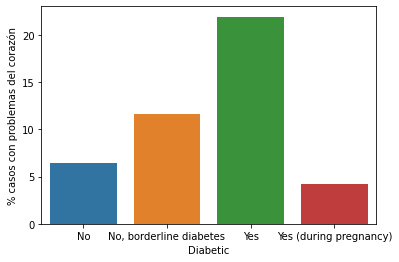

In [ ]:
sns.barplot(x=porcen_diab.index,
            y=porcen_diab,
            ).set_ylabel('% casos con problemas del corazón')
plt.show()

* El porcentaje de personas con enfermedades cardiacas es mayor en personas con diabetes

#### *HeartDisease(Target) vs Age*

In [ ]:
porcen_age = heart_data.loc[heart_data.HeartDisease == "Yes"].groupby("AgeCategory")[
            "HeartDisease"].count()/heart_data.groupby("AgeCategory")["HeartDisease"].count()*100

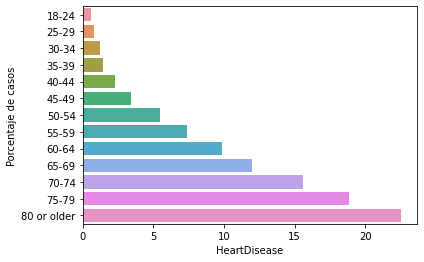

In [ ]:
sns.barplot(y=porcen_age.index,
            x=porcen_age,
            ).set_ylabel('Porcentaje de casos')
plt.show()

* La probabilidad de tener enfermedades cardiacas aumenta con la edad significativamente

#### *HeartDisease(Target) vs SleepTime*

In [ ]:
ct = pd.crosstab(heart_data.HeartDisease,heart_data.SleepTime, margins=True).T*100
ct["No"] = ct["No"]/ct["All"]*100
ct["Yes"] = ct["Yes"]/ct["All"]*100
ct["All"] = ct["All"]/ct["All"]*100
ct.drop("All", inplace = True)

In [ ]:
df_quintil_grosor = heart_data.groupby(["SleepTime"], dropna=False)["SleepTime"].min().to_frame(name='min').join(heart_data.groupby(["SleepTime"], dropna=False)["SleepTime"].max().to_frame(name='max')).join(heart_data.groupby(["SleepTime"], dropna=False)["SleepTime"].count().to_frame(name='nro_casos'))

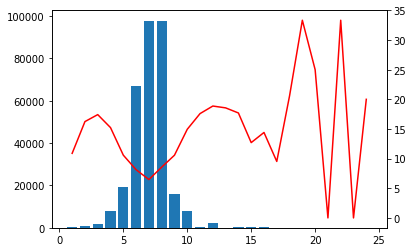

In [ ]:
fig, ax1 = plt.subplots()  
ax1.bar(x= df_quintil_grosor.index , height=df_quintil_grosor['nro_casos'])
ax2 = ax1.twinx()
ax2.plot(ct.index, ct['Yes'], color="red")
plt.show()

* Es un valor de cuantas horas diarias duerme la persona en promedio
* Las personas con enfermedades cardiacas tienen un promedio de horas igual al de las que no  
No-7.1 // Si-7.1
* Sin embargo se puede observar un gran aumento de los casos de enfermedades cardiacas en personas que duermen mas de 9hs o menos de 5hs llegando al punto de duplicar la probabilidad
* Los datos de personas que duermen mas de 15hs no son representativos y requieren una mayor evaluación

## ANALISIS MULTIVARIADO

In [ ]:
heart_data = pd.read_csv("heart-disease/heart_2020_cleaned.csv")

#### Analisis de correlación entre features y la precencia de la enfermedad

<Figure size 720x480 with 0 Axes>

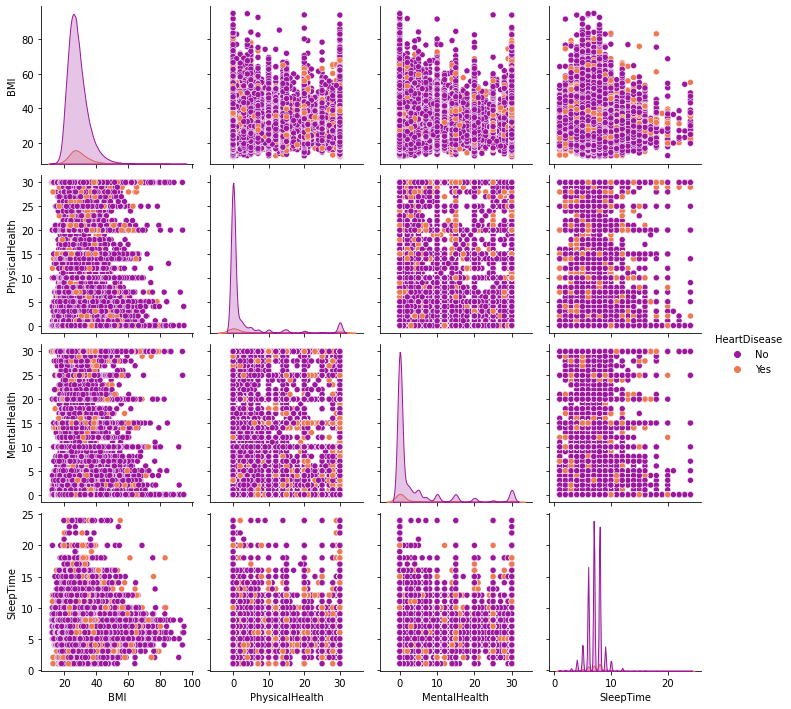

In [ ]:
plt.figure(dpi=120)
sns.pairplot(heart_data,hue = 'HeartDisease',palette = 'plasma')
plt.show()

##### Concluciones

* No se observan patrones significativos en los gráficos anteriores

### *BMI vs DiffWalking vs HeartDisease*
Se buscará una posible relación entre índice de masa corporal de una persona con el hecho de si esta tiene dificultad para caminar y ver como se comporta la probabilidad de tener problemas cardiacos

In [ ]:
heart_data["quintil_grosor"] = 1
heart_data["quintil_grosor"] = heart_data.BMI.apply(lambda x: 1 if x<=23.29 else (2 if (x>23.29) & (x<=25.83) else (3 if (x>25.83) & (x<=28.69) else (4 if (x>28.69) & (x<=32.55) else 5))))  

df_quintil_grosor = heart_data.groupby(["quintil_grosor"], dropna=False)["BMI"].min().to_frame(name='min').join(heart_data.groupby(["quintil_grosor"], dropna=False)["BMI"].max().to_frame(name='max')).join(heart_data.groupby(["quintil_grosor"], dropna=False)["BMI"].count().to_frame(name='nro_casos'))

ct = pd.crosstab(heart_data.HeartDisease,heart_data.quintil_grosor, margins=True).T*100
ct["No"] = ct["No"]/ct["All"]*100
ct["Yes"] = ct["Yes"]/ct["All"]*100
ct["All"] = ct["All"]/ct["All"]*100
ct.drop("All", inplace = True)

data_walk_x_hd = pd.crosstab(heart_data.quintil_grosor, heart_data.DiffWalking, margins=True).drop("All")
data_walk_x_hd["Yes"] = data_walk_x_hd["Yes"]/len(heart_data)*100
data_walk_x_hd["No"] = data_walk_x_hd["No"]/len(heart_data)*100
data_walk_x_hd = data_walk_x_hd[["Yes","No"]]

df_quintil_grosor = df_quintil_grosor.join(data_walk_x_hd)

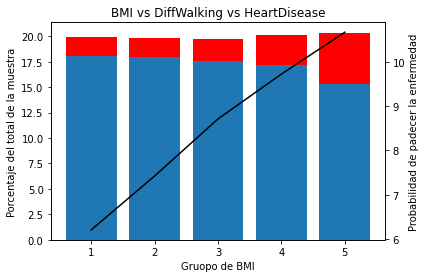

In [ ]:
plt.bar(x= df_quintil_grosor.index , height=df_quintil_grosor['No'])
plt.xlabel("Gruopo de BMI")
plt.ylabel("Porcentaje del total de la muestra")
plt.bar(x= df_quintil_grosor.index, height=df_quintil_grosor['Yes'], bottom=df_quintil_grosor['No'], color='r')
ax2 = plt.twinx()
ax2.plot(ct.index, ct['Yes'], color="black")
plt.ylabel("Probabilidad de padecer la enfermedad")
plt.title("BMI vs DiffWalking vs HeartDisease")

plt.show()

* En rojo tenemos la cantidad de personas con dificultad para caminar y en azul las que no
* Como se puede observar en el gráfico anterior a medida que el BMI aumenta tambien lo hace la dificultad para caminar  
* Ambas situaciones es tan muy relacionadas con el aumento del riesgo de padecer una enfermedad cardiaca  

### *AlcoholDrinking vs Smoking vs HeartDisease*

In [ ]:
df = heart_data['HeartDisease']
df = pd.DataFrame(df)
df.replace({"Yes":"Enfermo","No":"No enfermo"}, inplace=True)
df['Smoking'] = heart_data['Smoking']
df.replace({"Yes":"Fuma","No":"No fuma"}, inplace=True)
df['AlcoholDrinking'] = heart_data['AlcoholDrinking']
df.replace({"Yes":"Bebe","No":"No bebe"}, inplace=True)
fig = px.sunburst(df, path=['Smoking', 'AlcoholDrinking', 'HeartDisease'])
fig.update_traces(textinfo="label+percent parent")
fig.show()

* Como se observa en el grafico superior las personas que fuman son mas propensas a consumir mas alcohol
* Si bien el fumar si es un factor que aumenta la probabilidad de tener una enfermedad cardiaca esta probabilidad pareciera disminuir si la persona bebe

### *Sex vs PhysicalActivity vs HeartDisease*

In [ ]:
df = heart_data['HeartDisease']
df = pd.DataFrame(df)
df.replace({"Yes":"Enfermo","No":"No enfermo"}, inplace=True)
df['Sex'] = heart_data['Sex']
df['PhysicalActivity'] = heart_data['PhysicalActivity']
df.replace({"Yes":"Hace act. fisica","No":"No hace act. fisica"}, inplace=True)
fig = px.sunburst(df, path=['Sex', 'PhysicalActivity', 'HeartDisease'])
fig.update_traces(textinfo="label+percent parent")
fig.show()

* Como se observa en el grafico superior los hombres tienden a tener mas problemas del corazón
* Los hombres tienden a hacer actividad física mas que las mujeres, sin embargo es en ellas que el hecho de hacer ejercicio es mas beneficioso para disminuir las probabilidades de tener problemas del corazón

### *PhysicalHealth vs MentalHealth vs SleepTime*

In [ ]:
df_quintil_grosor = heart_data.groupby(["SleepTime"], dropna=False)["SleepTime"].min().to_frame(name='min').join(heart_data.groupby(["SleepTime"], dropna=False)["SleepTime"].max().to_frame(name='max')).join(heart_data.groupby(["SleepTime"], dropna=False)["SleepTime"].count().to_frame(name='nro_casos'))

In [ ]:
ct = pd.crosstab(heart_data.HeartDisease,heart_data.SleepTime, margins=True).T*100
ct["No"] = ct["No"]/ct["All"]*100
ct["Yes"] = ct["Yes"]/ct["All"]*100
ct["All"] = ct["All"]/ct["All"]*100
ct.drop("All", inplace = True)

In [ ]:
df_quintil_grosor = df_quintil_grosor.join(ct["Yes"]).join(heart_data.groupby(["SleepTime"], dropna=False)["MentalHealth"].mean())
df_quintil_grosor = df_quintil_grosor.join(heart_data.groupby(["SleepTime"], dropna=False)["PhysicalHealth"].mean())[["nro_casos","Yes","MentalHealth","PhysicalHealth"]]

In [ ]:
df_quintil_grosor = df_quintil_grosor[2:15]

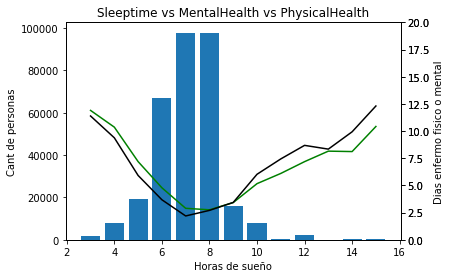

In [ ]:
fig, ax1 = plt.subplots()  
ax1.bar(x= df_quintil_grosor.index , height=df_quintil_grosor['nro_casos'])
plt.xlabel("Horas de sueño")
plt.ylabel("Cant de personas")
ax3 = ax1.twinx()
ax3.plot(df_quintil_grosor.index, df_quintil_grosor['MentalHealth'], color="green")
plt.ylim(0, 20)
ax4 = ax1.twinx()
ax4.plot(df_quintil_grosor.index, df_quintil_grosor['PhysicalHealth'], color="black")
plt.ylim(0, 20)
plt.ylabel("Dias enfermo fisico o mental")
plt.title("Sleeptime vs MentalHealth vs PhysicalHealth")
plt.show()

* Podemos observar la distribución de las horas de sueño de las personas, la línea verde representa la salud mental promedio de una persona que duerme la cantidad de hora correspondiente a la posicion x y la línea negra es lo mismo pero para la salud física, en ambos casos a mayor valor peor es la salud de la persona
* Podemos concluir que las personas que salen de la cantidad de horas de sueño promedio ven afectada seriamente su salud tanto físca como mental

## PREPARACIÓN DEL DATASET PARA EL MODELO DE ML

In [ ]:
heart_data = pd.read_csv("heart-disease/heart_2020_cleaned.csv")

In [ ]:
heart_data.HeartDisease.replace({"No":0,"Yes":1}, inplace=True)

In [ ]:
heart_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(heart_data.drop(columns=["HeartDisease"]), heart_data["HeartDisease"], test_size=0.15)

In [ ]:
X_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
211590,22.30,Yes,No,No,0.0,30.0,No,Female,30-34,White,No,No,Excellent,6.0,No,No,No
14436,26.63,No,No,No,0.0,15.0,No,Female,50-54,Asian,No,Yes,Very good,7.0,No,No,No
254206,28.89,No,No,No,0.0,2.0,No,Female,65-69,White,Yes,Yes,Very good,6.0,No,No,No
220495,27.34,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Good,8.0,Yes,No,No
196716,17.68,No,No,Yes,2.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247788,25.09,No,No,No,1.0,10.0,No,Male,18-24,White,No,Yes,Excellent,6.0,No,No,No
1319,36.21,Yes,No,Yes,21.0,0.0,No,Female,70-74,White,No,No,Good,6.0,No,No,Yes
49845,27.12,Yes,No,No,0.0,0.0,No,Male,80 or older,White,No,Yes,Very good,8.0,No,No,No
240532,25.82,Yes,No,No,0.0,14.0,No,Female,60-64,White,No,Yes,Very good,7.0,No,No,No


In [ ]:
preprocessor = ColumnTransformer(transformers=[("num",RobustScaler(),  selector(dtype_include=np.number)),
                                               ("cat", OneHotEncoder(handle_unknown='ignore', drop="first"), selector(dtype_include=object))])

In [ ]:
a = preprocessor.fit_transform(X_train).toarray()
b = preprocessor.transform(X_test).toarray()

In [ ]:
#Dataset de training
pd.DataFrame(a, columns=preprocessor.get_feature_names_out())

,num__BMI,num__PhysicalHealth,num__MentalHealth,num__SleepTime,cat__Smoking_Yes,cat__AlcoholDrinking_Yes,cat__Stroke_Yes,cat__DiffWalking_Yes,cat__Sex_Male,cat__AgeCategory_25-29,...,cat__Diabetic_Yes,cat__Diabetic_Yes (during pregnancy),cat__PhysicalActivity_Yes,cat__GenHealth_Fair,cat__GenHealth_Good,cat__GenHealth_Poor,cat__GenHealth_Very good,cat__Asthma_Yes,cat__KidneyDisease_Yes,cat__SkinCancer_Yes
0,0.268027,6.0,0.000000,0.5,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.881633,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.077551,0.0,0.000000,-0.5,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.606803,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.234014,0.0,1.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271820,-0.502041,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271821,0.259864,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
271822,-0.376871,15.0,6.666667,0.5,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
271823,0.089796,7.5,10.000000,1.5,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
#Dataset de testing
pd.DataFrame(b, columns=preprocessor.get_feature_names_out())

,num__BMI,num__PhysicalHealth,num__MentalHealth,num__SleepTime,cat__Smoking_Yes,cat__AlcoholDrinking_Yes,cat__Stroke_Yes,cat__DiffWalking_Yes,cat__Sex_Male,cat__AgeCategory_25-29,...,cat__Diabetic_Yes,cat__Diabetic_Yes (during pregnancy),cat__PhysicalActivity_Yes,cat__GenHealth_Fair,cat__GenHealth_Good,cat__GenHealth_Poor,cat__GenHealth_Very good,cat__Asthma_Yes,cat__KidneyDisease_Yes,cat__SkinCancer_Yes
0,-0.463946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.836735,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.410884,7.0,0.0,-0.5,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.093878,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.949660,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47965,0.382313,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47966,0.187755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47967,4.923810,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
47968,0.019048,7.5,0.0,-0.5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
